# Homework 5

## Question 1

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

The problem states that the starting concentration of $A$ is $10 \space mol/L$, $k=0.25 \space hr^{-1}$, and the time frame of interest is $20 \space hrs$. 
First, I define these variables. I chose a time step of $0.2 \space hrs$ to give many data points in hopes of being as accurate as possible. 
Time steps of $0.2 \space hrs$ gives 
$$\frac{20 \space hrs}{0.2\space hrs/step}=100 \space steps$$
However, to include the data point at $t=0$, Nsteps must be 101.

In [158]:
Ca0 = 10 #[mol/L]
t0 = 0 #[hr]
k = 0.25 #[1/hr]
dt = 0.2 #[hr]
Nsteps = 101

Next, I created a placeholder array of zeros that will be filled with calculated values of $C_A$ later, and defined the first value of the array as the starting concentration, $10 \space mol/L$.

I also created a corresponding time array from 0 to 20 hours, evenly spaced by dt. I printed the arrays to make sure they look correct.

In [159]:
Ca = np.zeros(Nsteps)
Ca[0] = Ca0
print(Ca)
t = np.arange(0,20.1,dt)
print(t)

[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8 20. ]


Next, I defined a function to calculate the rate of change of the concentration of A using the rate constant and the equation,
$$ \frac{dC_A(t)}{dt}=-kC_A $$

In [160]:
def drv(k,Ca):
    k = 0.25
    dcdt = -1*k*Ca
    return dcdt

Next, using a for loop, I used Euler's Method to calculate $C_A$ for each time step.

In [161]:
for i in range(1,Nsteps):
    Ca[i] = Ca[i-1] + dt*drv(k,Ca[i-1])

Text(0.5, 1.0, "Euler's Method Concentration")

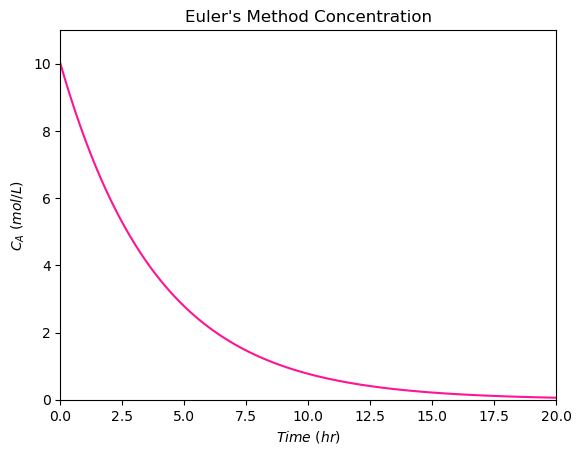

In [162]:
plt.plot(t,Ca,color='deeppink')

plt.xlim([0,20])
plt.ylim([0,11])

plt.xlabel('$Time \ (hr)$')
plt.ylabel('$C_A \ (mol/L)$')
plt.title("Euler's Method Concentration")

To easily evaluate this method's accuracy, used the equation describing the concentration of a species in a first order reaction,
$$ C_A = C_{A,0}*e^{-kt} $$

and graphed it against my calculated Euler's Method values. This way, I can easily see how accurate my values are by how closely they match up with the model on the graph.

In [163]:
Caeq = Ca0*np.exp(-1*k*t)

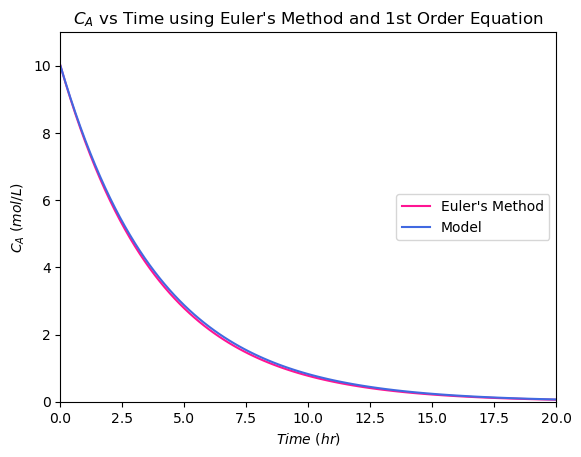

In [164]:
plt.plot(t,Ca, label="Euler's Method", color='deeppink')
plt.plot(t,Caeq, label='Model', color='royalblue')

plt.title("$C_A$ vs Time using Euler's Method and 1st Order Equation")
plt.xlabel('$Time \ (hr)$')
plt.ylabel('$C_A \ (mol/L)$')

plt.xlim([0,20])
plt.ylim([0,11])
plt.legend(loc='right')

From this graph, it's clear that my Euler's Method values using a timestep of 0.2 hours very closely matches the model, and provides a reasonable degree of accuracy.

## Question 2

To demonstrate the relationship between time step and error, I repeated the calculations from Question 1, but with time steps of 1, 2, and 5. Again, to include all the necessary values from 0 to 20 hours, 
$$Nsteps=\frac{20}{dt}+1$$
In order to keep the input for Nsteps as an integer, I had to manually define it rather than have python do the math for me. I also defined a unique time array for each time step, so that I could put them all on the same graph.

In [165]:
dt1 = 1
Nsteps1 = 21
Ca1 = np.zeros(Nsteps1)
Ca1[0] = 10
t1 = np.arange(0,20.1,1)

dt2 = 2
Nsteps2 = 11
Ca2 = np.zeros(Nsteps2)
Ca2[0] = 10
t2= np.arange(0,20.1,2)

dt3 = 5
Nsteps3 = 5
Ca3 = np.zeros(Nsteps3)
Ca3[0] = 10
t3 = np.arange(0,20.1,5)

Here is where I actually did the Euler's Method calculations for each time step. I printed Ca4 to make sure it looks correct.

In [166]:
for i in range(1,Nsteps1):
    Ca1[i] = Ca1[i-1] + dt1*rate(k,Ca1[i-1])

for i in range(1,Nsteps2):
    Ca2[i] = Ca2[i-1] + dt2*rate(k,Ca2[i-1])

for i in range(1,Nsteps3):
    Ca3[i] = Ca3[i-1] + dt3*rate(k,Ca3[i-1])

print(Ca3)

[10.        -2.5        0.625     -0.15625    0.0390625]


Here, each set of values is graphed against its unique time array. I also included the model values from Question 1 for a proper comparison.

(-3.0, 10.0)

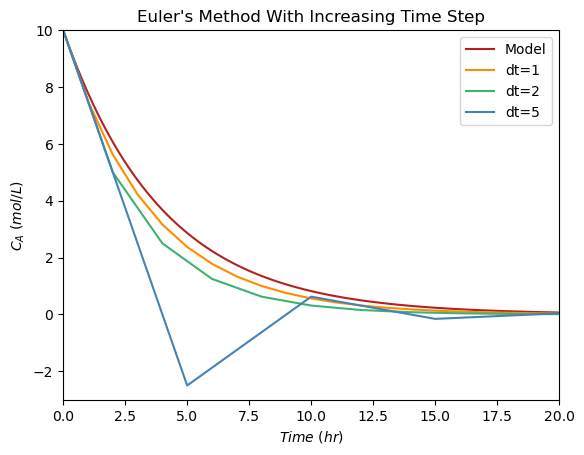

In [167]:
plt.plot(t,Caeq,label = 'Model',color='firebrick')
plt.plot(t1,Ca1,label = 'dt=1',color='darkorange')
plt.plot(t2,Ca2,label = 'dt=2',color='mediumseagreen')
plt.plot(t3,Ca3,label = 'dt=5',color='steelblue')

plt.title("Euler's Method With Increasing Time Step")
plt.xlabel('$Time \ (hr)$')
plt.ylabel('$C_A \ (mol/L)$')

#plt.grid(True)
plt.legend()
plt.xlim([0,20])
plt.ylim([-3,10])

From the graph, it's clear to see that as the time step increases, the Euler's Method values deviate more from the model and have more error.

## Question 3

The goal of this problem is to solve the system of differential equations and graph the concentrations of each component.

Governing equations:

$$ \frac{dC_A}{dt} = -k_1C_A - k_3C_DC_A $$
$$ \frac{dC_B}{dt} = 2k_1C_A - k_2C_BC_C $$
$$ \frac{dC_C}{dt} = -k_2C_BC_C $$
$$ \frac{dC_D}{dt} = k_2C_BC_C - k_3C_DC_A $$
$$ \frac{dC_E}{dt} = k_3C_DC_A $$

Initial conditions [$mol/L$]:
$$ C_A(0) = 10 $$
$$ C_B(0) = 0 $$
$$ C_C(0) = 25 $$
$$ C_D(0) = 0 $$
$$ C_E(0) = 0 $$

Constants:

$$ k_1 = 0.01 \space hr^{-1} $$
$$ k_2 = 0.1 \space \frac{L}{mol/hr}$$
$$ k_3 = 0.5 \space \frac{L}{mol/hr}$$

First, I defined a function to calculate the rates of change of each component.

In [168]:
def drv(t,y):
    '''
    The purpose of this function is to calculate the derivative values for each component at a single instant in time.

    Inputs:
        t (scalar) - The time at which each derivative is being calculated.
        y (array) - Concentration values at particular t value.

    Return:
        dydx (array) - An array filled with all the calculated values of the derivatives.
        
    '''
    #Constants
    k1 = 0.01
    k2 = 0.1
    k3 = 0.5
    
    #Concentration definitions
    Ca = y[0]
    Cb = y[1]
    Cc = y[2]
    Cd = y[3]
    Ce = y[4]
    
    #Derivative calculations
    dAdt = -1*k1*Ca -k3*Cd*Ca
    dBdt = 2*k1*Ca -k2*Cb*Cc
    dCdt = -k2*Cb*Cc
    dDdt = k2*Cb*Cc -k3*Cd*Ca
    dEdt = k3*Cd*Ca

    #Placeholder array
    dydx = np.zeros(5)

    #Defining return array
    dydx[0] = dAdt 
    dydx[1] = dBdt 
    dydx[2] = dCdt 
    dydx[3] = dDdt
    dydx[4] = dEdt
    
    return dydx

Using easy values for mental math, I checked that my function works.

In [169]:
test = drv(0,[1,1,1,1,1])
print(test)

[-0.51 -0.08 -0.1  -0.4   0.5 ]


Then, to finally use the given information in the problem statement, I defined an initial conditions array and an array for the time window of interest with intervals of 0.1 hrs.

In [170]:
#Initial conditions array for solving, units [=] mol/L:
Ca0 = 10
Cb0 = 0
Cc0 = 25
Cd0 = 0
Ce0 = 0
init = [Ca0,Cb0,Cc0,Cd0,Ce0]

#t units [=] hrs
tfinal = 50
trange = np.arange(0,50.1,0.1)

Next, using solve_ivp with my derivative function, a time interval of 0-50 hrs, and my initial conditions array as inputs, I solved the system of ODEs and saved the solution by printing it.

In [171]:
sol = solve_ivp(drv,[0,tfinal],init)
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.071e-03 ...  4.870e+01  5.000e+01]
        y: [[ 1.000e+01  9.999e+00 ...  2.322e+00  2.232e+00]
            [ 0.000e+00  1.402e-03 ...  2.370e-02  2.286e-02]
            ...
            [ 0.000e+00  1.228e-05 ...  4.060e-02  4.058e-02]
            [ 0.000e+00  1.453e-07 ...  5.097e+00  5.157e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 308
     njev: 0
      nlu: 0


Next, I graphed each individual solution on the same plot. $C_B$ is graphed with triangles instead of a line because at this scale, $C_B$ and $C_D$ seem to closely overlap. Triangles make the distinction more clear.

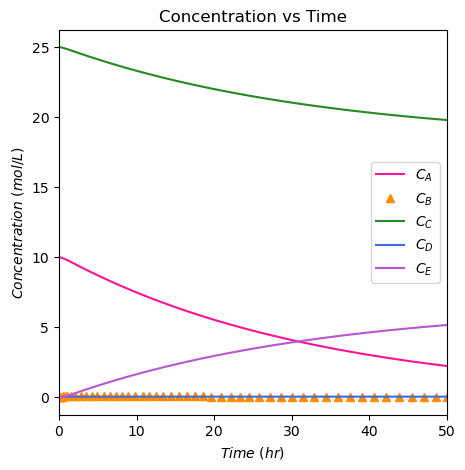

In [176]:
plt.figure(figsize = (5,5))
plt.plot(sol.t,sol.y[0],label = '$C_A$', color='deeppink')
plt.plot(sol.t,sol.y[1], '^',label = '$C_B$', color='darkorange')
plt.plot(sol.t,sol.y[2],label = '$C_C$',color='forestgreen')
plt.plot(sol.t,sol.y[3],label = '$C_D$', color='royalblue')
plt.plot(sol.t,sol.y[4],label = '$C_E$', color='mediumorchid')

plt.xlim([0,tfinal])

plt.title('Concentration vs Time')
plt.xlabel('$Time \ (hr)$')
plt.ylabel('$Concentration \ (mol/L)$')
plt.legend()

To more clearly tell the difference between $C_B$ and $C_D$, I scaled both by 100 and graphed them against each other on their own plot.

Text(0, 0.5, '$Concentration \\ (mol/L)$')

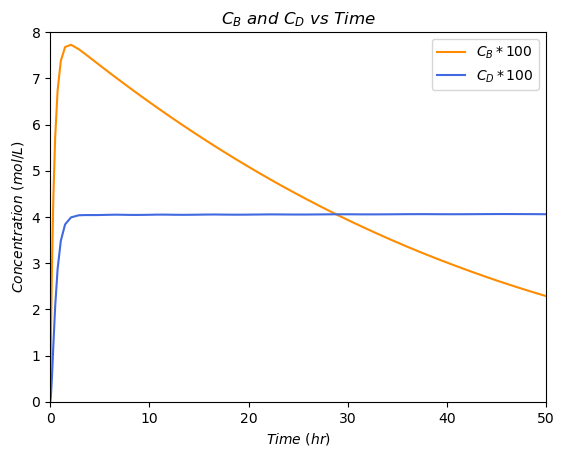

In [177]:
plt.plot(sol.t,sol.y[1]*100,label='$C_B*100$',color='darkorange')
plt.plot(sol.t,sol.y[3]*100,label='$C_D*100$',color='royalblue')

plt.legend()
plt.xlim([0,tfinal])
plt.ylim([0,8])

plt.title('$C_B \ and \ C_D \ vs \ Time$')
plt.xlabel('$Time \ (hr)$')
plt.ylabel('$Concentration \ (mol/L)$')

To find the maximum value of $C_B$, I used np.argmax to find the index of the maximum value in solve_ivp's solution to the system of equations. I specifically searched for the maximum in sol.y[1] because that is the part that corresponds to $C_B$. 

Then, once I had the index, I printed the max value by printing the value at row 2, column 10 (index 1,9) of solve_ivp's solution. Index 9 of solve_ivp's t values is the corresponding time. I rounded the values to 3 decimal places to make them more digestible for humans.

In [174]:
print('Index of max B value:',np.argmax(sol.y[1]))
print('Max B value (mol/L):',np.round(sol.y[1,9],3))
print('Time when max B is reached (hr):',np.round(sol.t[9],3))

Index of max B value: 9
Max B value (mol/L): 0.077
Time when max B is reached (hr): 2.103


Therefore, the maximum concentration of B is $0.077 \space mol/L$, and it reaches this concentration at $2.103 \space hrs$.